In [53]:
import sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
diet_data = pd.read_csv('datasets/diet_data.csv')

diet_data.sample(10)

,Date,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
48,9/16/2018,12.0,0.0,2.0,2690.0,5900.0,2.19,0.0,0.0,0.0,0.0,1.0,1.0,34.0
66,10/4/2018,12.0,4.0,4.0,2756.0,4300.0,1.56,1.0,1.0,0.0,1.0,0.0,0.0,-12.0
49,9/17/2018,12.0,2.0,4.0,2724.0,2250.0,0.83,0.0,1.0,0.0,0.0,1.0,1.0,-30.0
47,9/15/2018,11.0,13.0,2.0,2674.0,5650.0,2.11,0.0,1.0,1.0,0.0,1.0,1.0,16.0
75,10/13/2018,11.0,13.0,4.0,2676.0,4900.0,1.83,0.0,0.0,1.0,1.0,0.0,1.0,20.0
121,11/28/2018,12.0,0.0,0.0,2688.0,2350.0,0.87,1.0,1.0,1.0,0.0,0.0,1.0,-8.0
114,11/21/2018,12.0,2.0,2.0,2722.0,5350.0,1.97,1.0,0.0,0.0,1.0,0.0,1.0,14.0
14,8/13/2018,11.0,12.0,8.0,2664.0,2300.0,0.86,1.0,1.0,0.0,0.0,0.0,0.0,-2.0
10,8/9/2018,11.0,11.0,8.0,2648.0,2300.0,0.87,1.0,1.0,0.0,1.0,0.0,0.0,-18.0
19,8/18/2018,11.0,13.0,8.0,2680.0,3600.0,1.34,0.0,0.0,1.0,1.0,0.0,0.0,14.0


In [55]:
diet_data = diet_data.sample(frac=1).reset_index(drop=True)
diet_data.head()

,Date,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,9/21/2018,12.0,0.0,4.0,2692.0,4400.0,1.63,0.0,1.0,0.0,1.0,1.0,1.0,2.0
1,8/6/2018,12.0,0.0,2.0,2690.0,3100.0,1.15,1.0,1.0,0.0,0.0,0.0,0.0,6.0
2,8/2/2018,12.0,1.0,0.0,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0
3,9/16/2018,12.0,0.0,2.0,2690.0,5900.0,2.19,0.0,0.0,0.0,0.0,1.0,1.0,34.0
4,10/13/2018,11.0,13.0,4.0,2676.0,4900.0,1.83,0.0,0.0,1.0,1.0,0.0,1.0,20.0


In [56]:
diet_data[diet_data.isnull().any(axis=1)].count()

Date           10
Stone           2
Pounds          2
Ounces          2
weight_oz       9
calories        0
cals_per_oz     7
five_donuts     0
walk            0
run             0
wine            0
prot            0
weight          0
change          7
dtype: int64

Text(0, 0.5, 'Change in Weight')

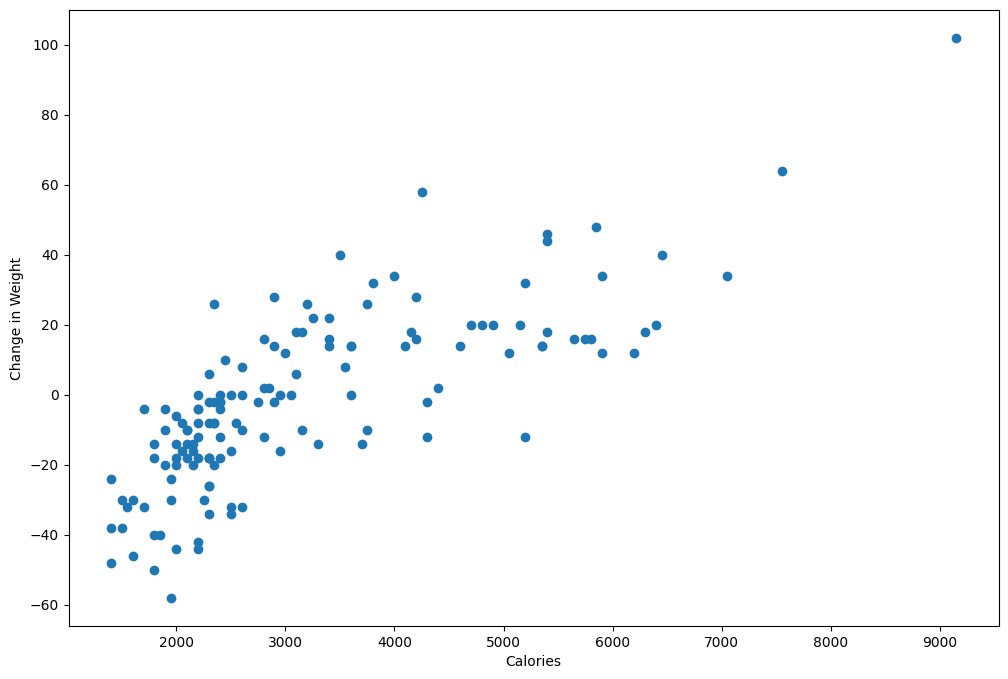

In [57]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(diet_data['calories'], diet_data['change'])

plt.xlabel('Calories')
plt.ylabel('Change in Weight')

In [58]:
diet_data = diet_data.dropna()

In [59]:
diet_features = diet_data.drop(['Date'], axis=1)

In [60]:
diet_data_corr = diet_features.corr()

diet_data_corr

,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
Stone,1.000000,-0.980384,-0.190219,0.787595,0.002099,-0.015046,0.052567,-0.109649,-0.033113,-0.072821,-0.133707,0.009897,-0.286142
Pounds,-0.980384,1.000000,0.157404,-0.652264,-0.030854,-0.016275,-0.029257,0.122125,0.054065,0.030841,0.135703,0.010845,0.214880
Ounces,-0.190219,0.157404,1.000000,-0.143811,-0.012220,-0.009169,0.007856,0.049295,-0.031251,0.041677,0.040839,0.008350,0.123744
weight_oz,0.787595,-0.652264,-0.143811,1.000000,-0.090605,-0.111182,0.113664,-0.037218,0.038408,-0.182756,-0.089135,0.073811,-0.425912
calories,0.002099,-0.030854,-0.012220,-0.090605,1.000000,0.999720,-0.239251,-0.434065,0.000840,0.270376,0.073819,0.123413,0.773989
cals_per_oz,-0.015046,-0.016275,-0.009169,-0.111182,0.999720,1.000000,-0.241737,-0.431685,0.000375,0.273028,0.075280,0.122006,0.780928
five_donuts,0.052567,-0.029257,0.007856,0.113664,-0.239251,-0.241737,1.000000,0.275835,-0.136558,-0.159311,-0.281215,-0.149653,-0.214417
walk,-0.109649,0.122125,0.049295,-0.037218,-0.434065,-0.431685,0.275835,1.000000,-0.132453,-0.072229,0.201095,0.059382,-0.384581
run,-0.033113,0.054065,-0.031251,0.038408,0.000840,0.000375,-0.136558,-0.132453,1.000000,-0.062577,-0.053838,0.249068,-0.150387
wine,-0.072821,0.030841,0.041677,-0.182756,0.270376,0.273028,-0.159311,-0.072229,-0.062577,1.000000,-0.027434,-0.063680,0.215387


<Axes: >

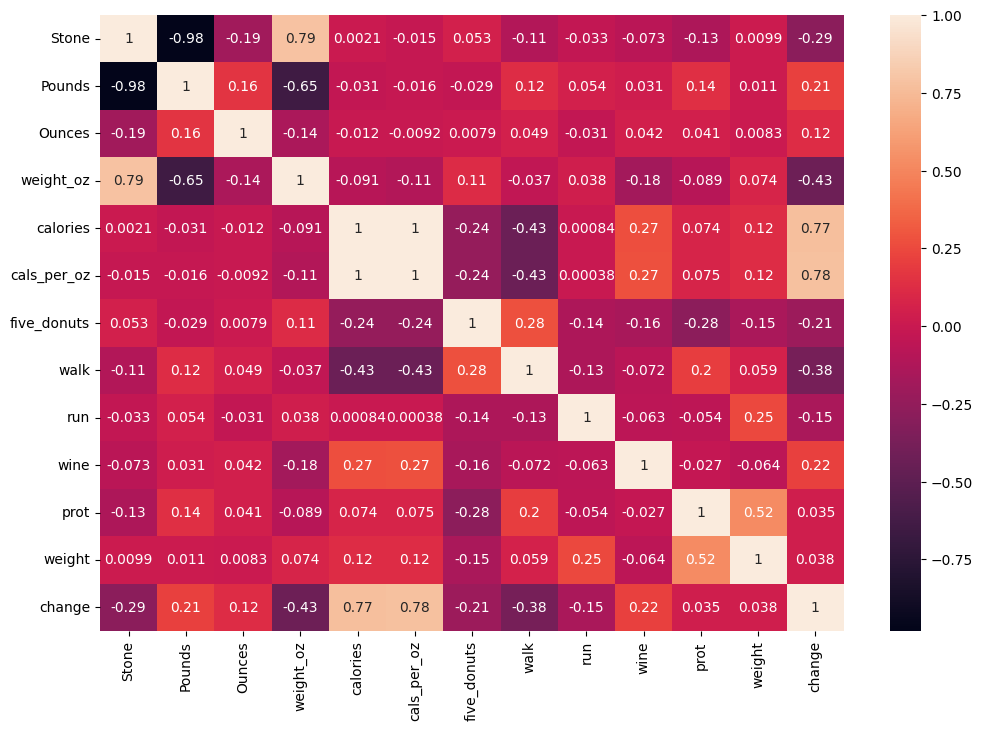

In [61]:
fig, ax = plt.subplots(figsize=(12,8))

sns.heatmap(diet_data_corr, annot=True)

In [62]:
from sklearn.model_selection import train_test_split

X = diet_data.drop(['change', 'Date', 'Stone', 'Pounds', 'Ounces'],axis=1)
Y = diet_data['change']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [64]:
from sklearn.neural_network import MLPRegressor

In [65]:
mlp_reg = MLPRegressor(activation='relu',
                       hidden_layer_sizes=(2,6,4),
                       solver='lbfgs',
                       verbose=True,
                       max_iter=100)                       

In [66]:
mlp_reg.fit(x_train, y_train)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           71     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.52750D+02    |proj g|=  4.21061D+00

At iterate    1    f=  2.51956D+02    |proj g|=  2.66740D+00

At iterate    2    f=  2.50688D+02    |proj g|=  8.80005D-01

At iterate    3    f=  2.50040D+02    |proj g|=  1.17221D+00

At iterate    4    f=  2.30325D+02    |proj g|=  3.57858D+01

At iterate    5    f=  2.19432D+02    |proj g|=  3.06271D+01

At iterate    6    f=  2.14864D+02    |proj g|=  4.34809D+01

At iterate    7    f=  1.87669D+02    |proj g|=  9.25580D+01

At iterate    8    f=  1.81215D+02    |proj g|=  1.76003D+02

At iterate    9    f=  1.58573D+02    |proj g|=  2.23004D+02

At iterate   10    f=  1.33706D+02    |proj g|=  8.94032D+01

At iterate   11    f=  1.31179D+02    |proj g|=  6.47808D+01

At iterate   12    f=  1.23811D+02    |proj g|=  4.04977D+01

At iterate   13    f=  1.2

 This problem is unconstrained.
/home/gauravjain/projects/sci-kit/scilib/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(hidden_layer_sizes=(2, 6, 4), max_iter=100, solver='lbfgs',
             verbose=True)

In [67]:
y_pred = mlp_reg.predict(x_test)

In [68]:
from sklearn.metrics import r2_score

In [69]:
mlp_reg.score(x_train, y_train)

0.7453450507515991

In [70]:
r2_score(y_test, y_pred)

0.842982688716875

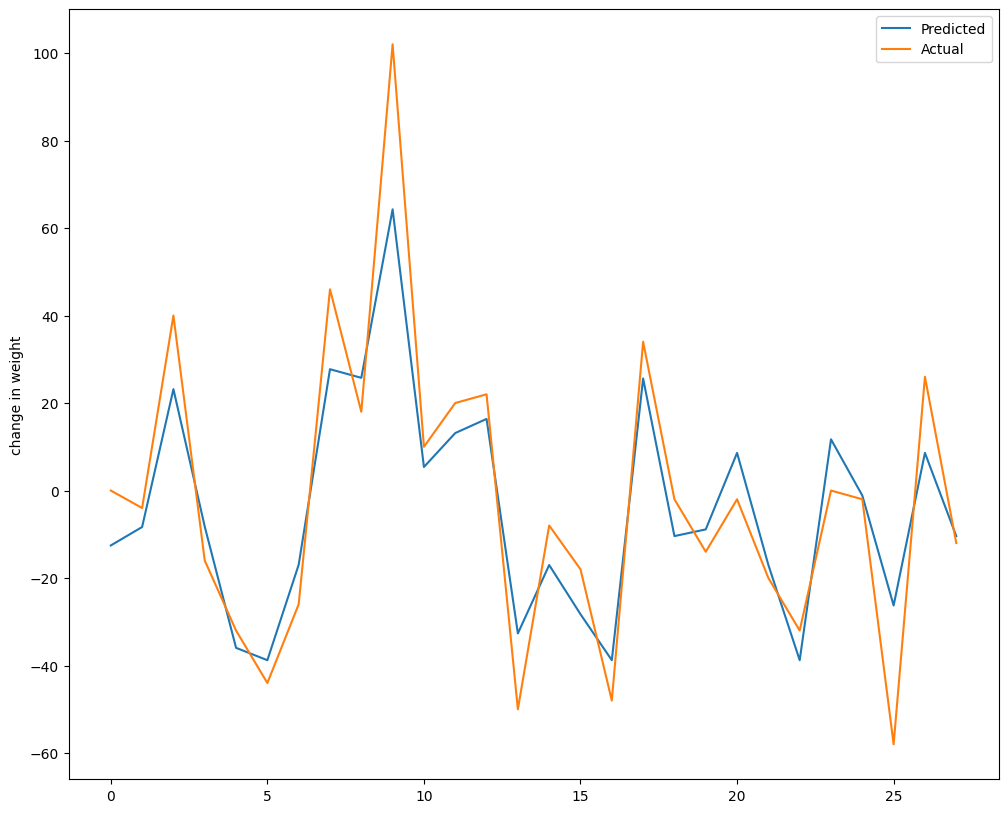

In [71]:
plt.figure(figsize=(12,10))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('change in weight')

plt.legend()
plt.show()